In [3]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("/Users/matthewgrossman/Desktop/WU FL25/Intro. to Data Viz./ai-jobs-dataviz/data/4. Economy/Data/fig_4.4.12.csv")

# Sort by the 'Function' column (which represents industry)
df_sorted = df.sort_values(by='Function')

# Show the sorted DataFrame
df_sorted.head(20)

# Save the sorted DataFrame as a new CSV in the top-level data folder
df_sorted.to_csv('../data/industry_outlook.csv', index=False)



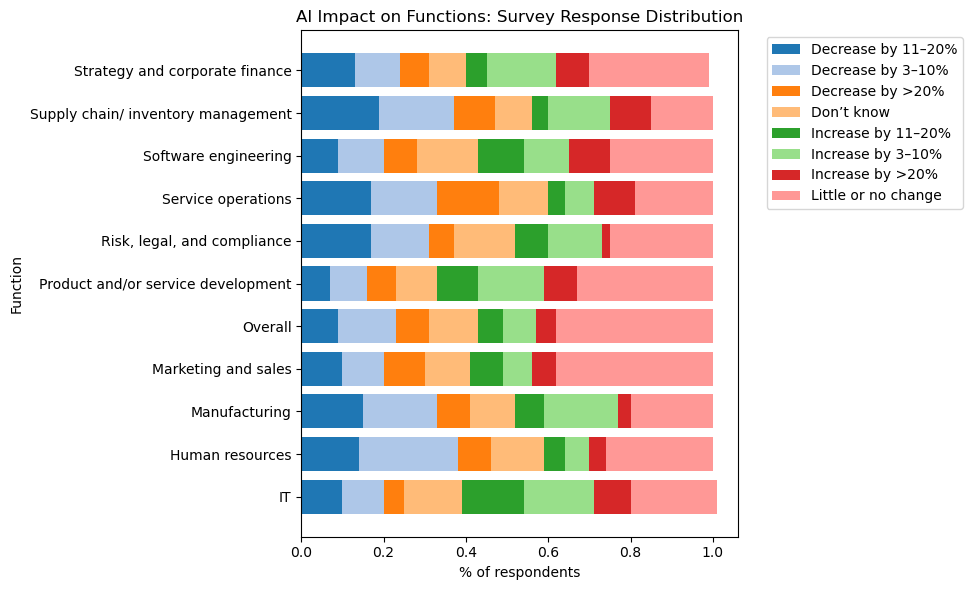

In [2]:
import matplotlib.pyplot as plt

# We need to pivot the data to get 'Function' as index and responses as columns
pivot_df = df.pivot_table(index='Function', columns='Response', values='% of respondents', aggfunc='sum', fill_value=0)

# Sort by total to show most common functions first
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

# Make a horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bottom = None

colors = plt.get_cmap('tab20').colors

for i, response in enumerate(pivot_df.columns):
    ax.barh(pivot_df.index, pivot_df[response], left=pivot_df.iloc[:, :i].sum(axis=1), label=response, color=colors[i % len(colors)])

ax.set_xlabel('% of respondents')
ax.set_ylabel('Function')
ax.set_title('AI Impact on Functions: Survey Response Distribution')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
